In [40]:
# !pip3 install tensorflow
!pip3 install fuzzywuzzy
!pip3 install rapidfuzz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.1 MB 2.7 MB/s eta 0:00:01


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


import requests
import zipfile
import io

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from fuzzywuzzy import fuzz
from rapidfuzz import fuzz, process
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import OneHotEncoder



/home/142402019/.local/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [6]:

DATASET_LINK = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'


url = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall()  # Extract all files to the current directory

print("Dataset downloaded and extracted successfully.")


Dataset downloaded and extracted successfully.


In [7]:
columns=['user id','movie id','rating','timestamp']
test_df1=pd.read_csv('ml-100k/u1.test', sep='\t', header=None, names=columns)
test_df2=pd.read_csv('ml-100k/u2.test', sep='\t', header=None, names=columns)
test_df3=pd.read_csv('ml-100k/u3.test', sep='\t', header=None, names=columns)
test_df4=pd.read_csv('ml-100k/u4.test', sep='\t', header=None, names=columns)
test_df5=pd.read_csv('ml-100k/u5.test', sep='\t', header=None, names=columns)

In [8]:
# print(test_df5['movie id'].max())
# test_df3=test_df3[test_df3['movie id']<1650]
# test_df4=test_df4[test_df4['movie id']<1650]
# test_df5=test_df4[test_df5['movie id']<1650]
# print(test_df3['movie id'].max())

In [9]:
test_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user id    20000 non-null  int64
 1   movie id   20000 non-null  int64
 2   rating     20000 non-null  int64
 3   timestamp  20000 non-null  int64
dtypes: int64(4)
memory usage: 625.1 KB


In [10]:
columns=['user id','movie id','rating','timestamp']
base_df1=pd.read_csv('ml-100k/u1.base', sep='\t', header=None, names=columns)
base_df2=pd.read_csv('ml-100k/u2.base', sep='\t', header=None, names=columns)
base_df3=pd.read_csv('ml-100k/u3.base', sep='\t', header=None, names=columns)
base_df4=pd.read_csv('ml-100k/u4.base', sep='\t', header=None, names=columns)
base_df5=pd.read_csv('ml-100k/u5.base', sep='\t', header=None, names=columns)

In [29]:
temp_df = pd.concat([test_df1, test_df2, test_df3, test_df4, test_df5])
print(temp_df.shape)
print(temp_df.columns)
movie_id_name_dict = {}
for index, row in temp_df.iterrows():
    movie_id_name_dict[row['movie id']] = row['movie title']
print(len(movie_id_name_dict.keys()))

(100000, 30)
Index(['user id', 'gender', 'occupation', 'zip code', 'movie id',
       'movie title', 'IMDb URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'rating', 'rating_timestamp',
       'release_year', 'age_group'],
      dtype='object')
1682


In [24]:

columns_movie = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = columns_movie.split(' | ')

items_dataset = pd.read_csv('ml-100k/u.item', sep='|', header=None, names=column_names2, encoding='latin-1')
print(items_dataset.shape)
items_dataset.head()


(1682, 24)


,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
for i in range(1, 6):
    base_df_name = f'base_df{i}'
    test_df_name = f'test_df{i}'
    globals()[base_df_name] = pd.merge(items_dataset, globals()[f'base_df{i}'], on='movie id')
    globals()[test_df_name] = pd.merge(items_dataset, globals()[f'test_df{i}'], on='movie id')
    globals()[base_df_name]['rating_timestamp'] = pd.to_datetime(globals()[base_df_name]['timestamp'], unit='s')
    globals()[test_df_name]['rating_timestamp'] = pd.to_datetime(globals()[test_df_name]['timestamp'], unit='s')

In [13]:
for i in range(1, 6):
    base_df_name = f'base_df{i}'
    test_df_name = f'test_df{i}'
    globals()[base_df_name]['release_year'] = globals()[base_df_name]['release date'].str.strip().str[-4:]
    globals()[test_df_name]['release_year'] = globals()[test_df_name]['release date'].str.strip().str[-4:]
    globals()[base_df_name].drop(['video release date','timestamp','release date'],axis=1,inplace=True)
    globals()[test_df_name].drop(['video release date','timestamp','release date'],axis=1,inplace=True)

In [14]:
column_names3 = ['user id', 'age', 'gender', 'occupation', 'zip code']
demographics_df= pd.read_csv('ml-100k/u.user', sep='|', header=None, names=column_names3)

In [15]:
for i in range(1, 6):
    base_df_name = f'base_df{i}'
    test_df_name = f'test_df{i}'
    globals()[base_df_name] = pd.merge(demographics_df, globals()[f'base_df{i}'], on='user id')
    globals()[test_df_name] = pd.merge(demographics_df, globals()[f'test_df{i}'], on='user id')

In [16]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '65+']
for i in range(1, 6):
    base_df_name = f'base_df{i}'
    test_df_name = f'test_df{i}'
    globals()[base_df_name]['age_group'] = pd.cut(globals()[base_df_name]['age'],bins=bins, labels=labels)
    globals()[test_df_name]['age_group'] = pd.cut(globals()[test_df_name]['age'],bins=bins, labels=labels)


In [17]:
for i in range(1, 6):
    base_df_name = f'base_df{i}'
    test_df_name = f'test_df{i}'
    globals()[base_df_name].drop(['age'],axis=1,inplace=True)
    globals()[test_df_name].drop(['age'],axis=1,inplace=True)

In [18]:
base_df1

,user id,gender,occupation,zip code,movie id,movie title,IMDb URL,unknown,Action,Adventure,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,rating_timestamp,release_year,age_group
0,1,M,technician,85711,1,Toy Story (1995),http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,...,0,0,0,0,0,0,5,1997-09-22 22:02:38,1995,0-25
1,1,M,technician,85711,2,GoldenEye (1995),http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,...,0,0,0,1,0,0,3,1997-10-15 05:26:11,1995,0-25
2,1,M,technician,85711,3,Four Rooms (1995),http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,...,0,0,0,1,0,0,4,1997-11-03 07:42:40,1995,0-25
3,1,M,technician,85711,4,Get Shorty (1995),http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,...,0,0,0,0,0,0,3,1997-10-15 05:25:19,1995,0-25
4,1,M,technician,85711,5,Copycat (1995),http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,...,0,0,0,1,0,0,3,1998-03-13 01:15:12,1995,0-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,943,M,student,77841,1067,Bottle Rocket (1996),http://us.imdb.com/M/title-exact?Bottle%20Rock...,0,0,0,...,0,0,0,0,0,0,2,1997-09-29 02:55:56,1996,0-25
79996,943,M,student,77841,1074,Reality Bites (1994),http://us.imdb.com/M/title-exact?Reality%20Bit...,0,0,0,...,0,0,0,0,0,0,4,1998-02-28 04:30:50,1994,0-25
79997,943,M,student,77841,1188,Young Guns II (1990),http://us.imdb.com/M/title-exact?Young%20Guns%...,0,1,0,...,0,0,0,0,0,1,3,1998-02-28 04:30:50,1990,0-25
79998,943,M,student,77841,1228,Under Siege 2: Dark Territory (1995),http://us.imdb.com/M/title-exact?Under%20Siege...,0,1,0,...,0,0,0,0,0,0,3,1998-02-28 04:31:15,1995,0-25


# Movie Recommendation System

### **Overview: Personalized Recommendations Based on User Preferences**

This recommendation system provides **personalized movie suggestions** based on user ratings and preferences. It takes into account:
- **High-rated movies** to identify preferences.
- **Genre and title similarity** using cosine similarity.
- **Sequel weighting** for new, related movie suggestions.

### **Steps in the Recommendation Process:**
1. **Filter High-Rated Movies**: Only include movies with a rating of **4 or above**.
2. **User Genre Profile**: Aggregate the user's ratings to form a profile.
3. **Identify Similar Users**: Use cosine similarity for genre preference.
4. **New Movies Only**: Exclude movies the user has already seen.
5. **Scoring and Ranking**: Combine **genre similarity**, **title familiarity**, and **sequel novelty**.

This balanced approach produces recommendations that align closely with each user’s unique tastes.


In [19]:


def plot_results(results_df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(results_df.set_index('Top_n').iloc[:, 1:], annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
    plt.title('Recommender Evaluation Results: Precision, Recall, and Hit Rate for Different Top N')
    plt.ylabel('Top N')
    plt.xlabel('Metrics')
    plt.show()

# # Assuming `results_df` is the DataFrame with the results
# plot_results(results_df)


For top_n: 5
Average Precision: 0.0344432661717921
Average Recall: 0.007486284521898041
Hit Rate: 0.1374337221633086


For top_n: 10
Average Precision: 0.03200424178154785
Average Recall: 0.013903917980466035
Hit Rate: 0.2142099681866384


For top_n: 25
Average Precision: 0.028615058324496713
Average Recall: 0.03257811524969519
Hit Rate: 0.34846235418875926


For top_n: 50
Average Precision: 0.025773064687168626
Average Recall: 0.058501291060518594
Hit Rate: 0.4706256627783669




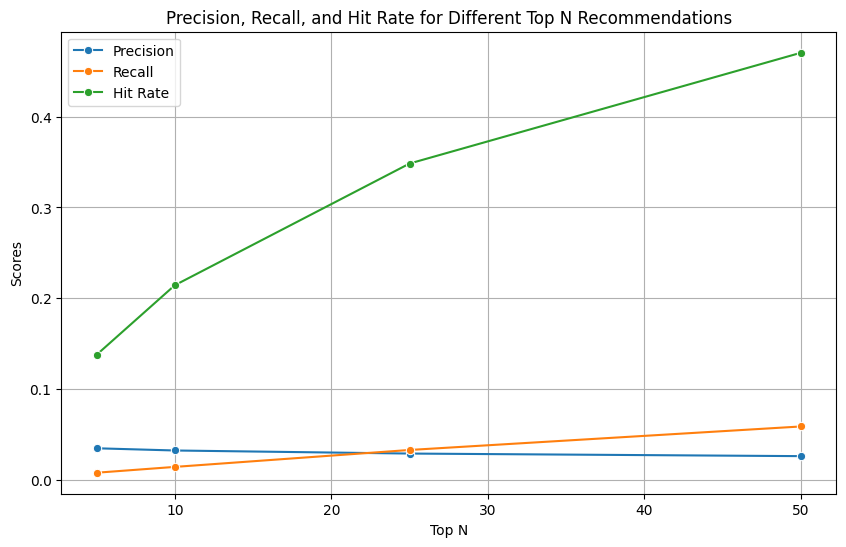

/tmp/ipykernel_263271/972627798.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies_df['movie title'] = recommended_movies_df['movie id'].map(movie_id_name_dict)
/tmp/ipykernel_263271/972627798.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='movie title', y='rating', data=recommended_movies_df, palette='viridis')


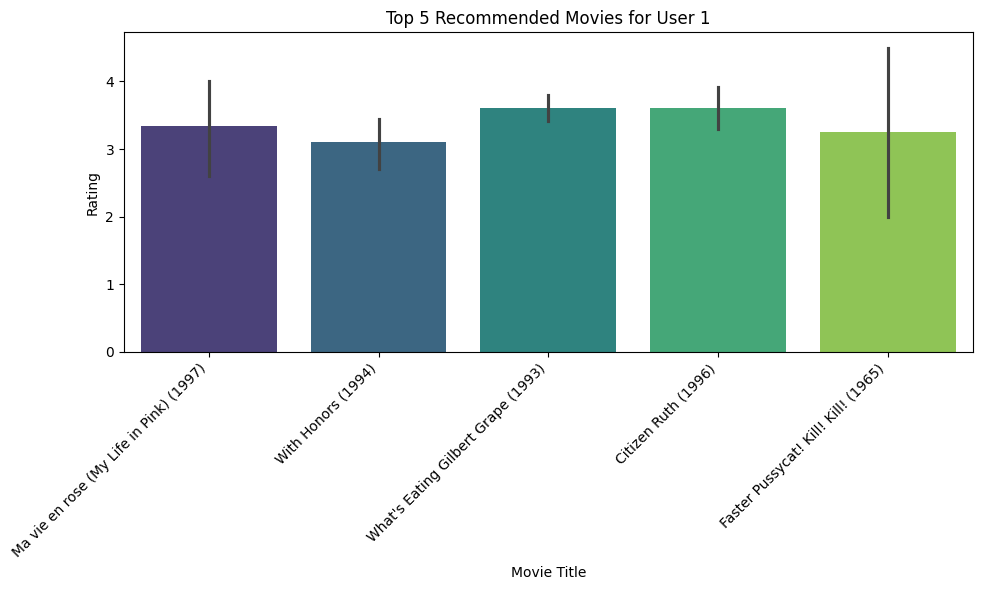

Results Table:
   Top_n  Average Precision  Average Recall  Hit Rate
0      5           0.034443        0.007486  0.137434
1     10           0.032004        0.013904  0.214210
2     25           0.028615        0.032578  0.348462
3     50           0.025773        0.058501  0.470626


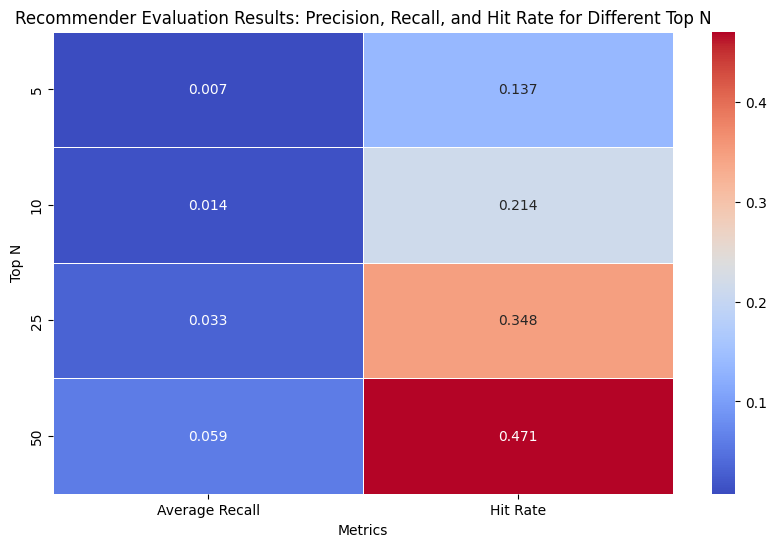

In [33]:


# Function to recommend movies based on the cosine similarity
def recommend_movies_by_genre(user_id, merged_dataset, top_n=5, genre_weight=0.7, title_weight=0.3, sequel_weight=0.1):
    high_rated_movies = merged_dataset[merged_dataset['rating'] >= 1]
    genre_columns = merged_dataset.columns[7:26]
    user_genre_preferences = high_rated_movies.groupby('user id')[genre_columns].sum()
    user_genre_preferences = user_genre_preferences.div(user_genre_preferences.sum(axis=1), axis=0)

    if user_id not in user_genre_preferences.index:
        return []
    
    user_similarity = cosine_similarity(user_genre_preferences)
    user_similarity_df = pd.DataFrame(user_similarity, index=user_genre_preferences.index, columns=user_genre_preferences.index)

    if user_id not in user_similarity_df.columns:
        return []
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]

    user_seen_movies = set(merged_dataset[merged_dataset['user id'] == user_id]['movie id'])
    candidate_movies = merged_dataset[(merged_dataset['user id'].isin(similar_users)) & (~merged_dataset['movie id'].isin(user_seen_movies))]
    candidate_movies = candidate_movies.drop_duplicates(subset='movie id')

    candidate_movies_genres = candidate_movies[genre_columns]
    user_genre_vector = user_genre_preferences.loc[user_id].values.reshape(1, -1)
    genre_scores = cosine_similarity(user_genre_vector, candidate_movies_genres)
    candidate_movies = candidate_movies.copy()
    candidate_movies['genre_score'] = genre_scores[0]

    candidate_movies['final_score'] = (
        candidate_movies['genre_score'] * genre_weight 
    )

    top_movies = candidate_movies.sort_values(by='final_score', ascending=False)['movie id'].unique()[:top_n]

    return top_movies.tolist()


# Evaluation function for precision, recall, and hit rate
def evaluate_recommender(method, user_id, train_df, test_df, top_n=5):
    recommended_df = method(user_id, train_df, top_n=top_n)
    
    if not recommended_df:
        return 0, 0, False

    recommended_movies = recommended_df
    actual_movies = set(test_df[test_df['user id'] == user_id]['movie id'])

    if not actual_movies:
        return 0, 0, False

    hit = len(set(recommended_movies).intersection(actual_movies)) > 0
    precision = len(set(recommended_movies).intersection(actual_movies)) / len(recommended_movies)
    recall = len(set(recommended_movies).intersection(actual_movies)) / len(actual_movies)

    return precision, recall, hit


# Perform k-fold cross-validation with visualizations
def k_fold_cross_validation(folds, merged_datasets, test_datasets, user_ids, top_ns=[5,10,25,50]):
    precision_list = []
    recall_list = []
    hit_rate_list = []
    results = []

    for top_n in top_ns:
        print(f"For top_n: {top_n}")
        total_precision, total_recall, total_hits = 0, 0, 0
        total_users = 0

        for i in range(folds):
            train_df = merged_datasets[i]
            test_df = test_datasets[i]

            for user_id in user_ids:
                precision, recall, hit = evaluate_recommender(recommend_movies_by_genre, user_id, train_df, test_df, top_n)
                total_precision += precision
                total_recall += recall
                total_hits += hit
                total_users += 1

        avg_precision = total_precision / total_users
        avg_recall = total_recall / total_users
        hit_rate = total_hits / total_users

        precision_list.append(avg_precision)
        recall_list.append(avg_recall)
        hit_rate_list.append(hit_rate)

        results.append({
            'Top_n': top_n,
            'Average Precision': avg_precision,
            'Average Recall': avg_recall,
            'Hit Rate': hit_rate
        })


        print(f"Average Precision: {avg_precision}")
        print(f"Average Recall: {avg_recall}")
        print(f"Hit Rate: {hit_rate}")
        print("\n")

    # Visualization of Precision, Recall, and Hit Rate for different top_n values
    df_metrics = pd.DataFrame({
        'Top N': top_ns,
        'Precision': precision_list,
        'Recall': recall_list,
        'Hit Rate': hit_rate_list
    })

    
    # print(df_metrics)
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_metrics, x='Top N', y='Precision', marker='o', label='Precision')
    sns.lineplot(data=df_metrics, x='Top N', y='Recall', marker='o', label='Recall')
    sns.lineplot(data=df_metrics, x='Top N', y='Hit Rate', marker='o', label='Hit Rate')
    plt.title('Precision, Recall, and Hit Rate for Different Top N Recommendations')
    plt.xlabel('Top N')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization of the top recommended movies for a specific user
    user_id = user_ids[0]  # Visualize for the first user
    recommended_movies = recommend_movies_by_genre(user_id, merged_datasets[0], top_n=5)
    recommended_movies_df = merged_datasets[0][merged_datasets[0]['movie id'].isin(recommended_movies)]
    
    recommended_movies_df['movie title'] = recommended_movies_df['movie id'].map(movie_id_name_dict)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='movie title', y='rating', data=recommended_movies_df, palette='viridis')
    plt.title(f"Top 5 Recommended Movies for User {user_id}")
    plt.xlabel('Movie Title')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Return a DataFrame of results    
    return pd.DataFrame(results)


# Prepare data for k-fold cross-validation
folds = 5
merged_datasets = [base_df1, base_df2, base_df3, base_df4, base_df5]  # Replace with your actual datasets
test_datasets = [test_df1, test_df2, test_df3, test_df4, test_df5]  # Replace with your actual datasets

# Use unique user IDs from the combined datasets
all_user_ids = list(set(pd.concat(merged_datasets)['user id'].unique()))

# Run k-fold cross-validation with visualizations
results_df_genre = k_fold_cross_validation(folds, merged_datasets, test_datasets, all_user_ids)

# Print the results table
print("Results Table:")
print(results_df_genre)


plot_results(results_df_genre)


Top N: 5
1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103	104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120	121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137	138	139	140	141	142	143	144	145	146	147	148	149	150	151	152	153	154	155	156	157	158	159	160	161	162	163	164	165	166	167	168	169	170	171	172	173	174	175	176	177	178	179	180	181	182	183	184	185	186	187	188	189	190	191	192	193	194	195	196	197	198	199	200	201	202	203	204	205	206	207	208	209	210	211	212	213	214	215	216	217	218	219	220	221	222	223	224	225	226	227	228	229	230	231	232	233	234	235	236	237	238	239	240	241	242	243	244	245	246	247	248	249	250	251	252	253	254	255	256	257	258	259	260	261	262	263	264	265	266	267	268	269	270	271	272	273	274	275

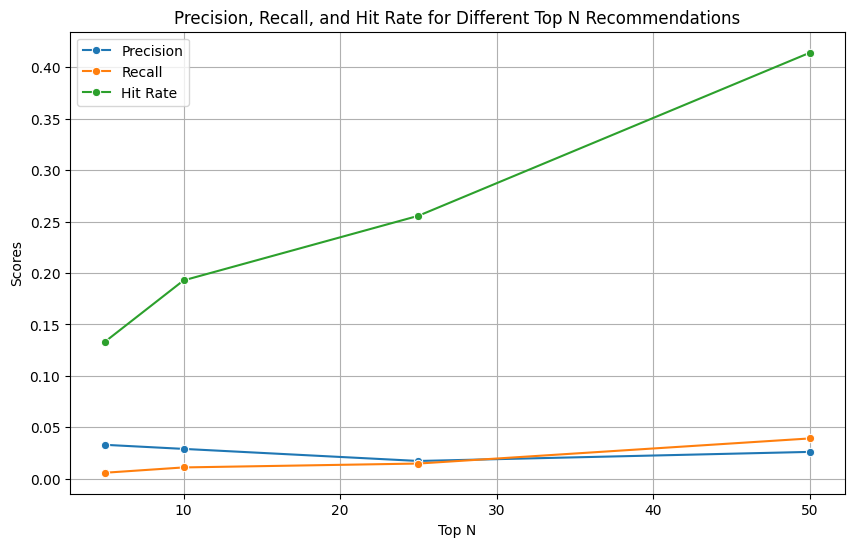

/tmp/ipykernel_263271/2481983338.py:351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies_df['movie title'] = recommended_movies_df['movie id'].map(movie_id_name_dict)
/tmp/ipykernel_263271/2481983338.py:354: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='movie title', y='rating', data=recommended_movies_df, palette='viridis')


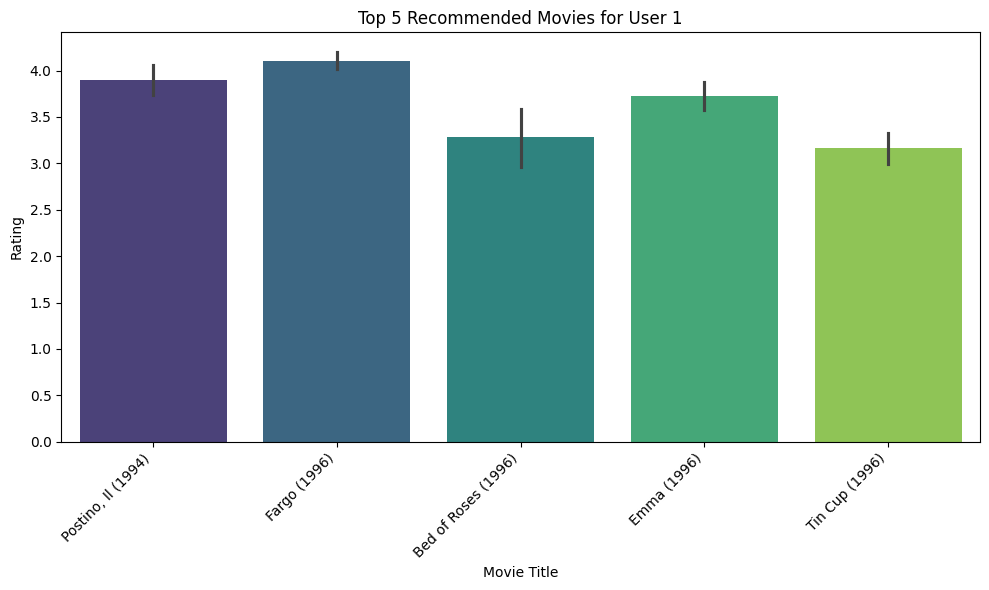

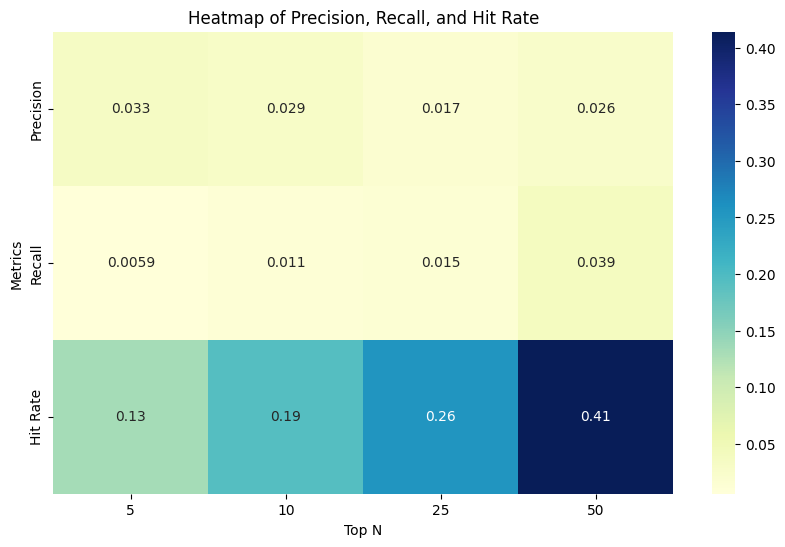

Results Table:
   Top N  Average Precision  Average Recall  Hit Rate
0      5           0.033043        0.005946  0.133404
1     10           0.029099        0.011086  0.192789
2     25           0.017357        0.014861  0.255567
3     50           0.026185        0.039255  0.413998


In [ ]:


import pandas as pd
from rapidfuzz import fuzz, process
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import seaborn as sns

# Function to check for sequel/prequel using RapidFuzz
def check_for_sequel_optimized(movie_title, user_movies, sequel_weight=0.1, threshold=80):
    matches = process.extract(movie_title, user_movies, scorer=fuzz.partial_ratio, limit=None)
    for title, similarity, _ in matches:
        if similarity >= threshold and movie_title != title:
            return sequel_weight  # Sequel detected
    return 0  # No sequel detected

def check_for_sequel_safe(movie_title, user_movies, sequel_weight=0.1, threshold=80):
    try:
        matches = process.extract(movie_title, user_movies, scorer=fuzz.partial_ratio, limit=None)
        for title, similarity, _ in matches:
            if similarity >= threshold and movie_title != title:
                return sequel_weight  # Sequel detected
        return 0  # No sequel detected
    except Exception as e:
        print(f"Error processing movie_title '{movie_title}': {e}")
        return 0


# Create sequel dictionary in parallel
def create_sequel_dict_parallel(user_ids, merged_dataset, workers=4):
    user_movies = merged_dataset[merged_dataset['user id'].isin(user_ids)]['movie title'].unique()
    movie_titles = merged_dataset['movie title'].unique()
    
    sequel_dict = {}
    for movie_title in movie_titles:
        sequel_dict[movie_title] = check_for_sequel_safe(movie_title, user_movies)
    
    return sequel_dict

    

# Function to recommend movies based on sequel similarity
def recommend_movies_by_sequel(user_id, merged_dataset, sequel_dict, top_n=5, sequel_weight=0.1):
    user_seen_movies = set(merged_dataset[merged_dataset['user id'] == user_id]['movie id'])
    candidate_movies = merged_dataset[~merged_dataset['movie id'].isin(user_seen_movies)]
    candidate_movies = candidate_movies.drop_duplicates(subset='movie id')
    
    # Apply precomputed sequel scores
    candidate_movies['sequel_score'] = candidate_movies['movie title'].apply(
        lambda x: sequel_dict.get(x, 0)
    )
    candidate_movies['final_score'] = candidate_movies['sequel_score'] * sequel_weight
    top_movies = candidate_movies.sort_values(by='final_score', ascending=False)['movie id'].unique()[:top_n]

    return top_movies.tolist()

# Evaluation function
def evaluate_sequel_recommender(method, user_id, train_df, test_df, sequel_dict, top_n=5):
    recommended_movies = method(user_id, train_df, sequel_dict, top_n=top_n)
    if not recommended_movies:
        return 0, 0, False

    actual_movies = set(test_df[test_df['user id'] == user_id]['movie id'])
    if not actual_movies:
        return 0, 0, False

    precision = len(set(recommended_movies).intersection(actual_movies)) / len(recommended_movies)
    recall = len(set(recommended_movies).intersection(actual_movies)) / len(actual_movies)
    hit = len(set(recommended_movies).intersection(actual_movies)) > 0

    return precision, recall, hit

# K-Fold Cross Validation
def k_fold_cross_validation(folds, merged_datasets, test_datasets, user_ids, top_ns=[5, 10, 25, 50]):
    results = []
    precision_list, recall_list, hit_rate_list = [], [], []
    
    for top_n in top_ns:
        print(f"Top N: {top_n}")
        total_precision, total_recall, total_hits, total_users = 0, 0, 0, 0

        for i in range(folds):
            train_df, test_df = merged_datasets[i], test_datasets[i]
            sequel_dict = create_sequel_dict_parallel(user_ids, train_df)

            for user_id in user_ids:
                print(user_id,end="\t")
                precision, recall, hit = evaluate_sequel_recommender(
                    recommend_movies_by_sequel, user_id, train_df, test_df, sequel_dict, top_n=top_n
                )
                total_precision += precision
                total_recall += recall
                total_hits += hit
                total_users += 1
            print("\n")
        avg_precision = total_precision / total_users
        avg_recall = total_recall / total_users
        hit_rate = total_hits / total_users
        precision_list.append(avg_precision)
        recall_list.append(avg_recall)
        hit_rate_list.append(hit_rate)

        print(f"Average Precision: {avg_precision}")
        print(f"Average Recall: {avg_recall}")
        print(f"Hit Rate: {hit_rate}")
        print()

        results.append({
            'Top_n': top_n,
            'Average Precision': avg_precision,
            'Average Recall': avg_recall,
            'Hit Rate': hit_rate
        })

    # Visualization of Precision, Recall, and Hit Rate
    df_metrics = pd.DataFrame({
        'Top N': top_ns,
        'Precision': precision_list,
        'Recall': recall_list,
        'Hit Rate': hit_rate_list
    })
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_metrics, x='Top N', y='Precision', marker='o', label='Precision')
    sns.lineplot(data=df_metrics, x='Top N', y='Recall', marker='o', label='Recall')
    sns.lineplot(data=df_metrics, x='Top N', y='Hit Rate', marker='o', label='Hit Rate')
    plt.title('Precision, Recall, and Hit Rate for Different Top N Recommendations')
    plt.xlabel('Top N')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization of the top recommended movies for a specific user
    user_id = user_ids[0]  # Visualize for the first user
    
    sequel_dict = create_sequel_dict_parallel([user_id], train_df)
    recommended_movies = recommend_movies_by_sequel(user_id, merged_datasets[0], sequel_dict, top_n=5)
    recommended_movies_df = merged_datasets[0][merged_datasets[0]['movie id'].isin(recommended_movies)]
    
    # Map movie IDs to movie titles using the dictionary
    recommended_movies_df['movie title'] = recommended_movies_df['movie id'].map(movie_id_name_dict)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='movie title', y='rating', data=recommended_movies_df, palette='viridis')
    plt.title(f"Top 5 Recommended Movies for User {user_id}")
    plt.xlabel('Movie Title')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Heatmap for Precision, Recall, and Hit Rate
    heatmap_data = df_metrics.set_index('Top N').transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True)
    plt.title('Heatmap of Precision, Recall, and Hit Rate')
    plt.ylabel('Metrics')
    plt.xlabel('Top N')
    plt.show()


    return pd.DataFrame(results)

# Example Usage
folds = 5
# Replace these with your actual datasets
merged_datasets = [base_df1, base_df2, base_df3, base_df4, base_df5]
test_datasets = [test_df1, test_df2, test_df3, test_df4, test_df5]
all_user_ids = list(set(pd.concat(merged_datasets)['user id'].unique()))

# Run k-fold cross-validation
results_df_sequel = k_fold_cross_validation(folds, merged_datasets, test_datasets, all_user_ids)

# Print Results
print("Results Table:")
print(results_df_sequel)



Evaluating for top_n = 5
1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103	104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120	121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137	138	139	140	141	142	143	144	145	146	147	148	149	150	151	152	153	154	155	156	157	158	159	160	161	162	163	164	165	166	167	168	169	170	171	172	173	174	175	176	177	178	179	180	181	182	183	184	185	186	187	188	189	190	191	192	193	194	195	196	197	198	199	200	201	202	203	204	205	206	207	208	209	210	211	212	213	214	215	216	217	218	219	220	221	222	223	224	225	226	227	228	229	230	231	232	233	234	235	236	237	238	239	240	241	242	243	244	245	246	247	248	249	250	251	252	253	254	255	256	257	258	259	260	261	262	263	264	265	266	267	268	269	270	271

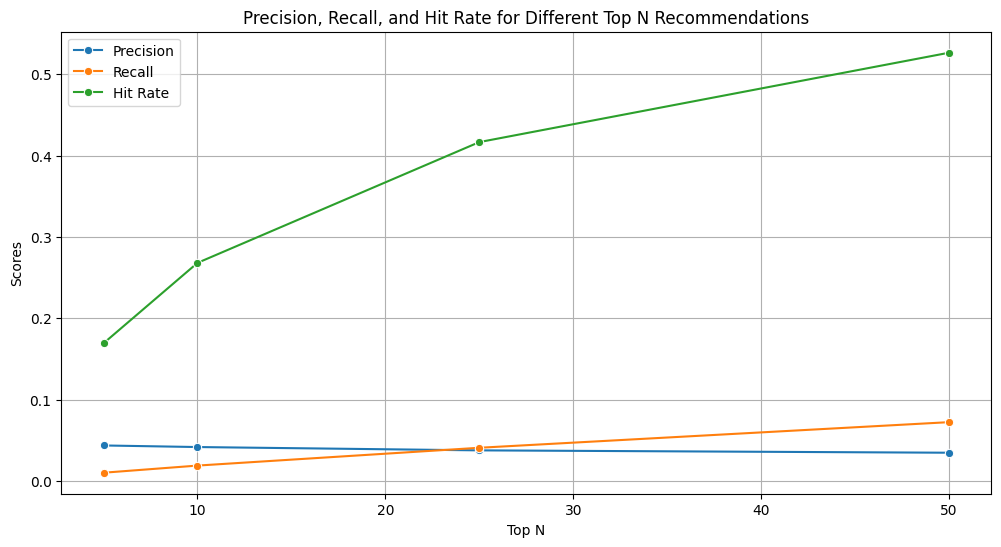

/tmp/ipykernel_263271/1716661080.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_movies_df['movie title'] = recommended_movies_df['movie id'].map(movie_id_name_dict)
/tmp/ipykernel_263271/1716661080.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='movie title', y='rating', data=recommended_movies_df, palette='viridis')


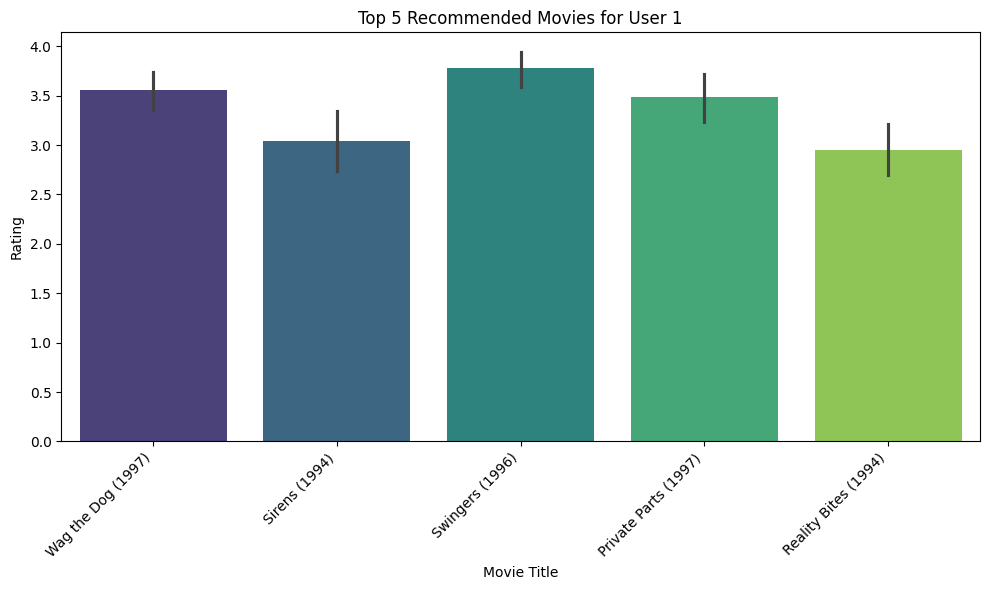

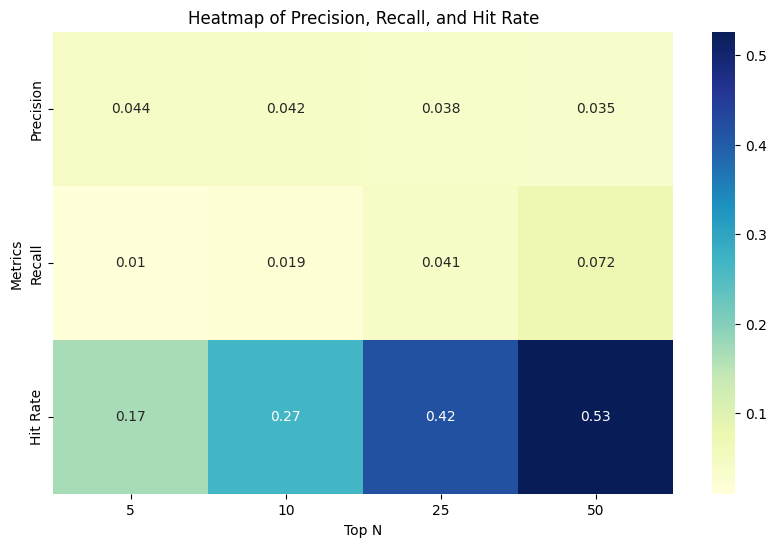

Results Table:
   Top_n  Average Precision  Average Recall  Hit Rate
0      5           0.043648        0.010132  0.169247
1     10           0.041697        0.018914  0.268081
2     25           0.037608        0.040807  0.416543
3     50           0.034715        0.072290  0.526405


In [38]:


# One-hot encode the occupation for movies
def encode_movie_features(dataset):
    one_hot_encoder = OneHotEncoder()
    encoded_features = one_hot_encoder.fit_transform(dataset[['occupation']]).toarray()
    feature_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(['occupation']))
    return pd.concat([dataset.reset_index(drop=True), feature_df], axis=1)

# Recommend movies based on content similarity (occupation-based)
def recommend_movies_by_occupation(user_id, merged_dataset, top_n=5):
    required_columns = ['user id', 'rating', 'occupation', 'movie id']
    if not all(col in merged_dataset.columns for col in required_columns):
        raise ValueError(f"Missing required columns in dataset: {', '.join(required_columns)}")

    merged_dataset = encode_movie_features(merged_dataset)

    user_high_rated = merged_dataset[(merged_dataset['user id'] == user_id) & (merged_dataset['rating'] >= 1)]
    if user_high_rated.empty:
        return []

    non_feature_columns = ['user id', 'rating', 'occupation', 'movie id', 'movie title', 'IMDb URL']
    feature_columns = merged_dataset.select_dtypes(include=[np.number]).columns.difference(non_feature_columns)
    
    movie_features = merged_dataset[feature_columns].values
    user_movies_features = user_high_rated[feature_columns].values

    similarity_scores = cosine_similarity(user_movies_features, movie_features)
    movie_similarity = similarity_scores.mean(axis=0)

    merged_dataset['similarity_score'] = movie_similarity
    unseen_movies = merged_dataset[~merged_dataset['movie id'].isin(user_high_rated['movie id'])]

    top_movies = unseen_movies.sort_values(by='similarity_score', ascending=False)['movie id'].unique()[:top_n]
    return top_movies.tolist()

# Evaluation function for precision, recall, and hit rate
def evaluate_recommender(method, user_id, train_df, test_df, top_n=5):
    recommended_df = method(user_id, train_df, top_n=top_n)
    
    if not recommended_df:
        return 0, 0, False

    recommended_movies = recommended_df
    actual_movies = set(test_df[test_df['user id'] == user_id]['movie id'])

    if not actual_movies:
        return 0, 0, False

    hit = len(set(recommended_movies).intersection(actual_movies)) > 0
    precision = len(set(recommended_movies).intersection(actual_movies)) / len(recommended_movies)
    recall = len(set(recommended_movies).intersection(actual_movies)) / len(actual_movies)

    return precision, recall, hit

# Perform k-fold cross-validation and visualization
def k_fold_cross_validation(folds, merged_datasets, test_datasets, user_ids, top_ns=[5, 10, 25, 50]):
    results = []
    precision_list, recall_list, hit_rate_list = [], [], []

    for top_n in top_ns:
        print(f"Evaluating for top_n = {top_n}")
        total_precision, total_recall, total_hits = 0, 0, 0
        total_users = 0

        for i in range(folds):
            train_df = merged_datasets[i]
            test_df = test_datasets[i]

            for user_id in user_ids:
                print(user_id,end="\t")
                precision, recall, hit = evaluate_recommender(recommend_movies_by_occupation, user_id, train_df, test_df, top_n)
                total_precision += precision
                total_recall += recall
                total_hits += hit
                total_users += 1

        avg_precision = total_precision / total_users
        avg_recall = total_recall / total_users
        hit_rate = total_hits / total_users
        print("\n")
        print(f"Average Precision for top_n = {top_n}: {avg_precision:.4f}")
        print(f"Average Recall for top_n = {top_n}: {avg_recall:.4f}")
        print(f"Hit Rate for top_n = {top_n}: {hit_rate:.4f}")
        print("\n")

        precision_list.append(avg_precision)
        recall_list.append(avg_recall)
        hit_rate_list.append(hit_rate)

        results.append({
            'Top_n': top_n,
            'Average Precision': avg_precision,
            'Average Recall': avg_recall,
            'Hit Rate': hit_rate
        })

    # Visualization of Precision, Recall, and Hit Rate for different top_n values
    df_metrics = pd.DataFrame({
        'Top N': top_ns,
        'Precision': precision_list,
        'Recall': recall_list,
        'Hit Rate': hit_rate_list
    })

    # Lineplot for Precision, Recall, and Hit Rate
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_metrics, x='Top N', y='Precision', marker='o', label='Precision')
    sns.lineplot(data=df_metrics, x='Top N', y='Recall', marker='o', label='Recall')
    sns.lineplot(data=df_metrics, x='Top N', y='Hit Rate', marker='o', label='Hit Rate')
    plt.title('Precision, Recall, and Hit Rate for Different Top N Recommendations')
    plt.xlabel('Top N')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization of the top recommended movies for a specific user
    user_id = user_ids[0]  # Visualize for the first user
    recommended_movies = recommend_movies_by_occupation(user_id, merged_datasets[0], top_n=5)
    recommended_movies_df = merged_datasets[0][merged_datasets[0]['movie id'].isin(recommended_movies)]
    
    recommended_movies_df['movie title'] = recommended_movies_df['movie id'].map(movie_id_name_dict)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='movie title', y='rating', data=recommended_movies_df, palette='viridis')
    plt.title(f"Top 5 Recommended Movies for User {user_id}")
    plt.xlabel('Movie Title')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Heatmap for Precision, Recall, and Hit Rate
    heatmap_data = df_metrics.set_index('Top N').transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True)
    plt.title('Heatmap of Precision, Recall, and Hit Rate')
    plt.ylabel('Metrics')
    plt.xlabel('Top N')
    plt.show()

    # Return a DataFrame of results    
    return pd.DataFrame(results)

# Prepare data for k-fold cross-validation
folds = 5
merged_datasets = [base_df1, base_df2, base_df3, base_df4, base_df5]  # Replace with your actual datasets
test_datasets = [test_df1, test_df2, test_df3, test_df4, test_df5]  # Replace with your actual datasets

# Use unique user IDs from the combined datasets
all_user_ids = list(set(pd.concat(merged_datasets)['user id'].unique()))

# Run k-fold cross-validation and get results
results_df_occupation = k_fold_cross_validation(folds, merged_datasets, test_datasets, all_user_ids)

# Print the results table
print("Results Table:")
print(results_df_occupation)


In [ ]:


# One-hot encode the age group for movies
def encode_age_group_features(dataset):
    one_hot_encoder = OneHotEncoder()
    encoded_features = one_hot_encoder.fit_transform(dataset[['age_group']]).toarray()
    feature_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(['age_group']))
    return pd.concat([dataset.reset_index(drop=True), feature_df], axis=1)

# Recommend movies based on content similarity (age group-based)
def recommend_movies_by_age_group(user_id, merged_dataset, top_n=5):
    # Check if dataset has required columns
    required_columns = ['user id', 'rating', 'age_group', 'movie id']
    if not all(col in merged_dataset.columns for col in required_columns):
        raise ValueError(f"Missing required columns in dataset: {', '.join(required_columns)}")

    # Encode age group features for movies
    merged_dataset = encode_age_group_features(merged_dataset)

    # Get movies rated highly by the user
    user_high_rated = merged_dataset[(merged_dataset['user id'] == user_id) & (merged_dataset['rating'] >= 4)]
    if user_high_rated.empty:
        return []

    # Select only numerical feature columns for similarity computation
    non_feature_columns = ['user id', 'rating', 'age_group', 'movie id', 'movie title', 'IMDb URL']
    feature_columns = merged_dataset.select_dtypes(include=[np.number]).columns.difference(non_feature_columns)
    
    movie_features = merged_dataset[feature_columns].values
    user_movies_features = user_high_rated[feature_columns].values

    # Compute content similarity (cosine) for all movies
    similarity_scores = cosine_similarity(user_movies_features, movie_features)

    # Average similarity across all high-rated movies by the user
    movie_similarity = similarity_scores.mean(axis=0)

    # Add similarity scores to movies and filter out already seen movies
    merged_dataset['similarity_score'] = movie_similarity
    unseen_movies = merged_dataset[~merged_dataset['movie id'].isin(user_high_rated['movie id'])]

    # Rank by similarity scores and return top N recommendations
    top_movies = unseen_movies.sort_values(by='similarity_score', ascending=False)['movie id'].unique()[:top_n]
    return top_movies.tolist()

# Evaluation function for precision, recall, and hit rate
def evaluate_recommender(method, user_id, train_df, test_df, top_n=5):
    recommended_movies = method(user_id, train_df, top_n=top_n)
    
    if not recommended_movies:
        return 0, 0, False

    actual_movies = set(test_df[test_df['user id'] == user_id]['movie id'])

    if not actual_movies:
        return 0, 0, False

    if user_id == 1:  # Debugging specific user
        recommended_movies_lst = list(recommended_movies)
        recommended_movies_lst.sort()
        actual_movies_lst = list(actual_movies)
        actual_movies_lst.sort()
        print("\n\n Recommended --> : ", recommended_movies_lst, user_id, len(recommended_movies_lst))
        print(" Actual      --> : ", actual_movies_lst, user_id, len(actual_movies_lst), "\n\n")

    if not actual_movies:
        return 0, 0, False

    hit = len(set(recommended_movies).intersection(actual_movies)) > 0
    precision = len(set(recommended_movies).intersection(actual_movies)) / len(recommended_movies)
    recall = len(set(recommended_movies).intersection(actual_movies)) / len(actual_movies)

    return precision, recall, hit

# Perform k-fold cross-validation and visualization
def k_fold_cross_validation(folds, merged_datasets, test_datasets, user_ids, top_ns=[5, 10, 25, 50]):
    results = []
    precision_list, recall_list, hit_rate_list = [], [], []

    for top_n in top_ns:
        print(f"Evaluating for top_n = {top_n}")
        total_precision, total_recall, total_hits = 0, 0, 0
        total_users = 0

        for i in range(folds):
            train_df = merged_datasets[i]
            test_df = test_datasets[i]

            for user_id in user_ids:
                print(user_id,end="\t")
                precision, recall, hit = evaluate_recommender(recommend_movies_by_age_group, user_id, train_df, test_df, top_n)
                total_precision += precision
                total_recall += recall
                total_hits += hit
                total_users += 1
        print("\n")
        avg_precision = total_precision / total_users
        avg_recall = total_recall / total_users
        hit_rate = total_hits / total_users

        print(f"Average Precision for top_n = {top_n}: {avg_precision:.4f}")
        print(f"Average Recall for top_n = {top_n}: {avg_recall:.4f}")
        print(f"Hit Rate for top_n = {top_n}: {hit_rate:.4f}")
        print("\n")

        precision_list.append(avg_precision)
        recall_list.append(avg_recall)
        hit_rate_list.append(hit_rate)

        results.append({
            'Top_n': top_n,
            'Average Precision': avg_precision,
            'Average Recall': avg_recall,
            'Hit Rate': hit_rate
        })

    # Visualization of Precision, Recall, and Hit Rate for different top_n values
    df_metrics = pd.DataFrame({
        'Top N': top_ns,
        'Precision': precision_list,
        'Recall': recall_list,
        'Hit Rate': hit_rate_list
    })

    # Lineplot for Precision, Recall, and Hit Rate
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_metrics, x='Top N', y='Precision', marker='o', label='Precision')
    sns.lineplot(data=df_metrics, x='Top N', y='Recall', marker='o', label='Recall')
    sns.lineplot(data=df_metrics, x='Top N', y='Hit Rate', marker='o', label='Hit Rate')
    plt.title('Precision, Recall, and Hit Rate for Different Top N Recommendations')
    plt.xlabel('Top N')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization of the top recommended movies for a specific user
    user_id = user_ids[0]  # Visualize for the first user
    recommended_movies = recommend_movies_by_age_group(user_id, merged_datasets[0], top_n=5)
    recommended_movies_df = merged_datasets[0][merged_datasets[0]['movie id'].isin(recommended_movies)]
    
    recommended_movies_df['movie title'] = recommended_movies_df['movie id'].map(movie_id_name_dict)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='movie title', y='rating', data=recommended_movies_df, palette='viridis')
    plt.title(f"Top 5 Recommended Movies for User {user_id}")
    plt.xlabel('Movie Title')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Heatmap for Precision, Recall, and Hit Rate
    heatmap_data = df_metrics.set_index('Top N').transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True)
    plt.title('Heatmap of Precision, Recall, and Hit Rate')
    plt.ylabel('Metrics')
    plt.xlabel('Top N')
    plt.show()

    # Return a DataFrame of results    
    return pd.DataFrame(results)

# Prepare data for k-fold cross-validation
folds = 5
merged_datasets = [base_df1, base_df2, base_df3, base_df4, base_df5]  # Replace with your actual datasets
test_datasets = [test_df1, test_df2, test_df3, test_df4, test_df5]  # Replace with your actual datasets

# Use unique user IDs from the combined datasets
all_user_ids = list(set(pd.concat(merged_datasets)['user id'].unique()))

# Run k-fold cross-validation and get results
results_df_age = k_fold_cross_validation(folds, merged_datasets, test_datasets, all_user_ids)

# Print the results table
print("Results Table:")
print(results_df_age)


In [43]:
lst = list(base_df1['age_group'].unique().tolist())
for i in lst:
    print(i)

0-25
46-55
26-35
36-45
56-65
65+


Evaluating for top_n = 5
1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103	104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120	121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137	138	139	140	141	142	143	144	146	147	148	149	150	151	152	153	154	155	156	157	158	159	160	161	162	163	164	165	166	168	169	170	171	172	173	174	175	176	177	178	179	180	181	182	183	184	185	186	187	188	189	190	191	192	193	194	195	196	197	198	199	200	202	203	204	205	206	207	208	209	210	211	212	213	214	215	216	217	218	219	220	221	222	223	224	225	226	227	228	229	230	231	232	233	234	235	236	237	238	239	240	241	242	243	244	245	246	247	248	249	250	251	252	253	254	255	256	257	258	259	260	261	262	263	264	265	266	267	268	269	270	271	272	273	274	27

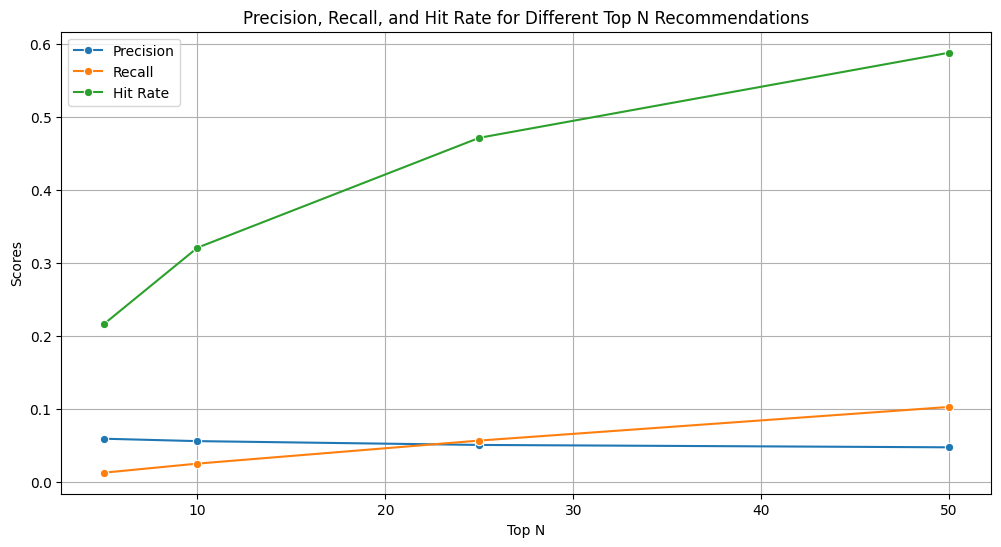

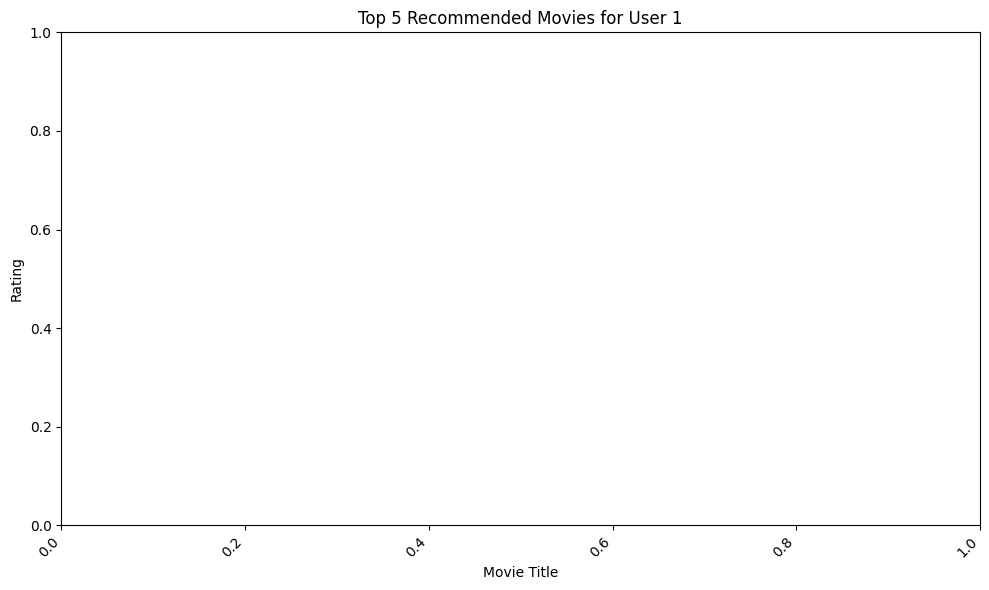

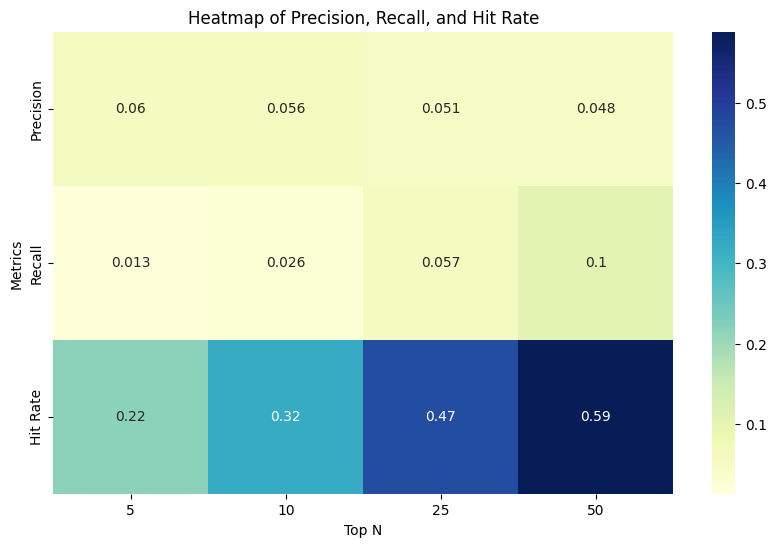

Results Table:
   Top_n  Average Precision  Average Recall  Hit Rate
0      5           0.059632        0.013055  0.216216
1     10           0.056336        0.025542  0.321297
2     25           0.051106        0.057088  0.471784
3     50           0.047864        0.103136  0.588324


In [39]:


# Recommend movies based on demographics (occupation and age group)
def recommend_movies_by_demographics(user_id, final_df, top_n=5):
    genre_columns = final_df.columns[7:26]  # Adjust the column slice to match your actual genre columns
    user_data = final_df[final_df['user id'] == user_id].iloc[0]
    user_occupation = user_data['occupation']
    user_age_group = user_data['age_group']

    group_users = final_df[
        (final_df['occupation'] == user_occupation) &
        (final_df['age_group'] == user_age_group)
    ]['user id'].unique()

    user_seen_movies = set(final_df[final_df['user id'] == user_id]['movie id'])

    candidate_movies = final_df[
        (final_df['user id'].isin(group_users)) & 
        (~final_df['movie id'].isin(user_seen_movies))
    ].drop_duplicates('movie id')

    if candidate_movies.empty:
        return pd.DataFrame(columns=['movie_id', 'movie_title', 'similarity_score'])

    candidate_movies_genres = candidate_movies[genre_columns].values
    user_rated_movies = final_df[(final_df['user id'] == user_id) & (final_df['rating'] >= 1)]
    user_genre_preferences = user_rated_movies[genre_columns].mean().values if not user_rated_movies.empty else candidate_movies[genre_columns].mean().values
    genre_scores = cosine_similarity([user_genre_preferences], candidate_movies_genres)

    candidate_movies['similarity_score'] = genre_scores[0]
    results_df = candidate_movies[['movie id', 'movie title', 'similarity_score']].copy()
    results_df.columns = ['movie_id', 'movie_title', 'similarity_score']

    return results_df.nlargest(top_n, 'similarity_score')

# Evaluate recommender's precision, recall, and hit rate
def evaluate_recommender(method, user_id, final_df, test_df, top_n=5):
    recommended_df = method(user_id, final_df, top_n=top_n)
    if recommended_df.empty:
        return 0, 0, 0

    recommended_movies = recommended_df['movie_id'].tolist()
    actual_movies = set(test_df[test_df['user id'] == user_id]['movie id'])
    if not actual_movies:
        return 0, 0, 0

    hit = len(set(recommended_movies).intersection(actual_movies)) > 0
    precision = len(set(recommended_movies).intersection(actual_movies)) / len(recommended_movies)
    recall = len(set(recommended_movies).intersection(actual_movies)) / len(actual_movies)

    return precision, recall, hit

# Perform k-fold cross-validation and visualization
def k_fold_cross_validation(folds, merged_datasets, test_datasets, user_ids, top_ns=[5, 10, 25, 50]):
    results = []
    precision_list, recall_list, hit_rate_list = [], [], []

    for top_n in top_ns:
        print(f"Evaluating for top_n = {top_n}")
        total_precision, total_recall, total_hits = 0, 0, 0
        total_users = 0

        for i in range(folds):
            train_df = merged_datasets[i]
            test_df = test_datasets[i]

            for user_id in user_ids:
                print(user_id,end="\t")

                precision, recall, hit = evaluate_recommender(recommend_movies_by_demographics, user_id, train_df, test_df, top_n)
                total_precision += precision
                total_recall += recall
                total_hits += hit
                total_users += 1
        print("\n")

        avg_precision = total_precision / total_users if total_users else 0
        avg_recall = total_recall / total_users if total_users else 0
        hit_rate = total_hits / total_users if total_users else 0

        print(f"Average Precision for top_n = {top_n}: {avg_precision:.4f}")
        print(f"Average Recall for top_n = {top_n}: {avg_recall:.4f}")
        print(f"Hit Rate for top_n = {top_n}: {hit_rate:.4f}")
        print("\n")

        precision_list.append(avg_precision)
        recall_list.append(avg_recall)
        hit_rate_list.append(hit_rate)

        results.append({
            'Top_n': top_n,
            'Average Precision': avg_precision,
            'Average Recall': avg_recall,
            'Hit Rate': hit_rate
        })

    # Visualization of Precision, Recall, and Hit Rate for different top_n values
    df_metrics = pd.DataFrame({
        'Top N': top_ns,
        'Precision': precision_list,
        'Recall': recall_list,
        'Hit Rate': hit_rate_list
    })

    # Lineplot for Precision, Recall, and Hit Rate
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_metrics, x='Top N', y='Precision', marker='o', label='Precision')
    sns.lineplot(data=df_metrics, x='Top N', y='Recall', marker='o', label='Recall')
    sns.lineplot(data=df_metrics, x='Top N', y='Hit Rate', marker='o', label='Hit Rate')
    plt.title('Precision, Recall, and Hit Rate for Different Top N Recommendations')
    plt.xlabel('Top N')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization of the top recommended movies for a specific user
    user_id = user_ids[0]  # Visualize for the first user
    recommended_movies = recommend_movies_by_demographics(user_id, merged_datasets[0], top_n=5)
    recommended_movies_df = merged_datasets[0][merged_datasets[0]['movie id'].isin(recommended_movies)]
    
    recommended_movies_df['movie title'] = recommended_movies_df['movie id'].map(movie_id_name_dict)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='movie title', y='rating', data=recommended_movies_df, palette='viridis')
    plt.title(f"Top 5 Recommended Movies for User {user_id}")
    plt.xlabel('Movie Title')
    plt.ylabel('Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Heatmap for Precision, Recall, and Hit Rate
    heatmap_data = df_metrics.set_index('Top N').transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar=True)
    plt.title('Heatmap of Precision, Recall, and Hit Rate')
    plt.ylabel('Metrics')
    plt.xlabel('Top N')
    plt.show()

    return pd.DataFrame(results)


def clean_data(df):
    if 'occupation' in df.columns:
        df = df[~df['occupation'].str.contains('studentstudent', na=False)]
    if 'zip code' in df.columns:
        df['zip code'] = pd.to_numeric(df['zip code'], errors='coerce')
        df = df.dropna(subset=['zip code'])
    if 'age_group' in df.columns:
        df = df.dropna(subset=['age_group'])
    return df



# Example usage
base_dfs = [clean_data(base_df1), clean_data(base_df2), clean_data(base_df3), clean_data(base_df4), clean_data(base_df5)]
test_dfs = [clean_data(test_df1), clean_data(test_df2), clean_data(test_df3), clean_data(test_df4), clean_data(test_df5)]

unique_users = list(pd.concat(test_dfs)['user id'].unique().tolist())
results_df_demo = k_fold_cross_validation(5, base_dfs, test_dfs, unique_users, top_ns=[5, 10, 25, 50])

# Print the results table
print("Results Table:")
print(results_df_demo)


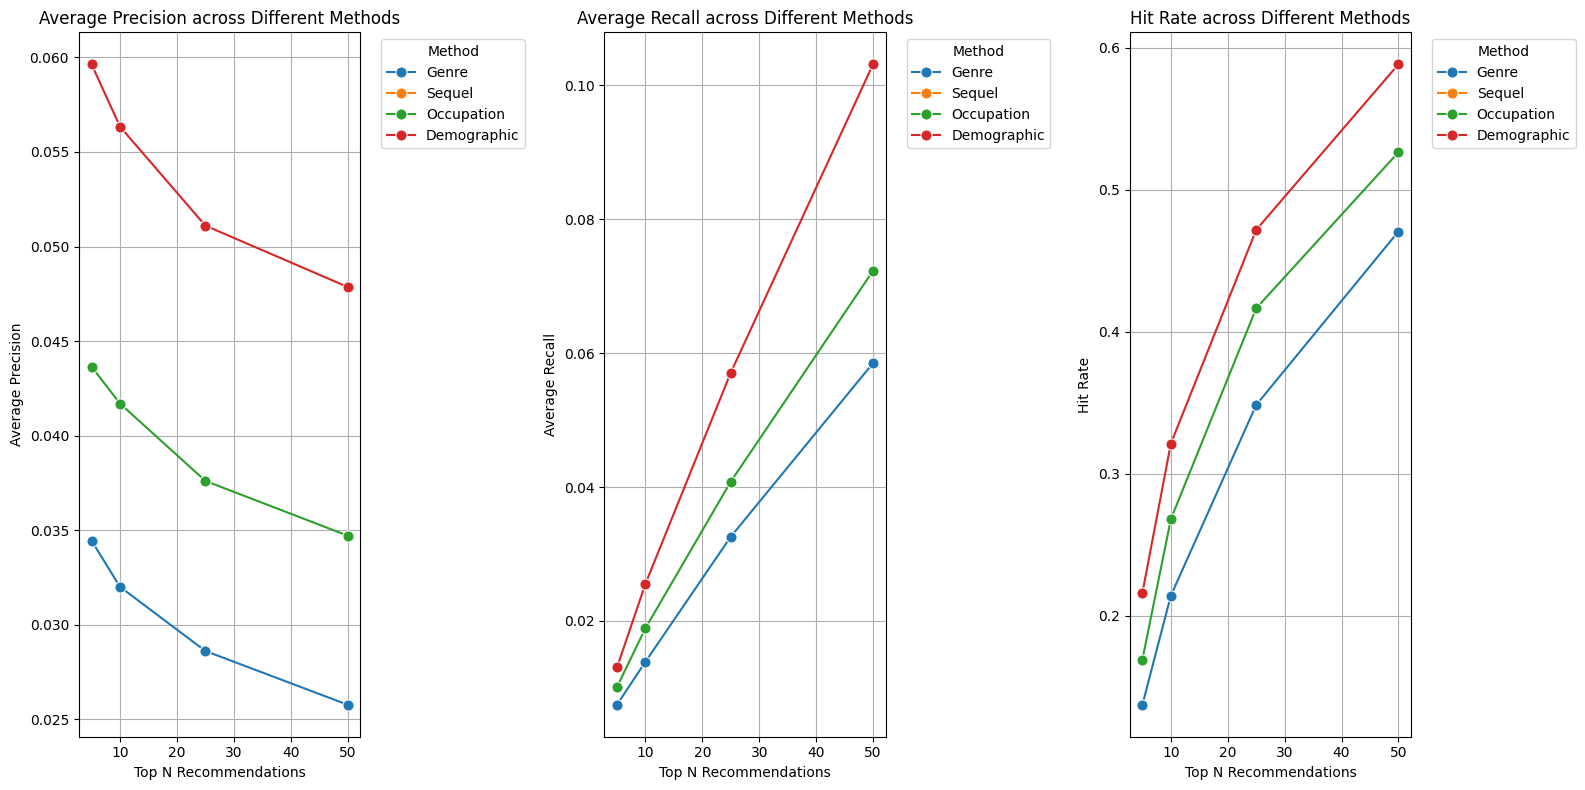

In [45]:
# Create a new column 'Method' in each DataFrame to differentiate between methods
results_df_genre['Method'] = 'Genre'
results_df_sequel['Method'] = 'Sequel'
results_df_occupation['Method'] = 'Occupation'
# results_df_age['Method'] = 'Age Group'
results_df_demo['Method'] = 'Demographic'

# Combine all the results DataFrames into one
# combined_results = pd.concat([results_df_genre, results_df_sequel, results_df_occupation, results_df_age, results_df_demo], ignore_index=True)
combined_results = pd.concat([results_df_genre, results_df_sequel, results_df_occupation, results_df_demo], ignore_index=True)

# Plot the combined graph for all methods (Precision, Recall, and Hit Rate)
def plot_combined_graph(combined_results):
    # Set up the figure
    plt.figure(figsize=(16, 8))

    # List of metrics to plot
    metrics = ['Average Precision', 'Average Recall', 'Hit Rate']
    
    # Create subplots for each metric (Precision, Recall, and Hit Rate)
    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, 3, i)
        sns.lineplot(data=combined_results, x='Top_n', y=metric, hue='Method', marker='o', markersize=8)
        plt.title(f'{metric} across Different Methods')
        plt.xlabel('Top N Recommendations')
        plt.ylabel(metric)
        plt.grid(True)
        plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the graph
plot_combined_graph(combined_results)

In [46]:
results_df_age_lst = [{'Top_n': 5, 'Average Precision': 0.038557794273594674, 'Average Recall': 0.0088517286862743, 'Hit Rate': 0.15800636267232238}, {'Top_n': 10, 'Average Precision': 0.0358218451749729, 'Average Recall': 0.01575339712957965, 'Hit Rate': 0.24114528101802757}, {'Top_n': 25, 'Average Precision': 0.032653234358430976, 'Average Recall': 0.03638457542699657, 'Hit Rate': 0.3927889713679745}, {'Top_n': 50, 'Average Precision': 0.029323435843054194, 'Average Recall': 0.06228588312786024, 'Hit Rate': 0.49946977730646874}]
results_df_age = pd.DataFrame(results_df_age_lst)

print(results_df_age)




   Top_n  Average Precision  Average Recall  Hit Rate
0      5           0.038558        0.008852  0.158006
1     10           0.035822        0.015753  0.241145
2     25           0.032653        0.036385  0.392789
3     50           0.029323        0.062286  0.499470


In [62]:
print(results_df_sequel)
print(results_df_occupation)

   Top_n  Average Precision  Average Recall  Hit Rate
0      5           0.024136        0.005376  0.113680
1     10           0.014486        0.006022  0.129799
2     25           0.008119        0.007460  0.158643
3     50           0.006155        0.010378  0.201909
   Top_n  Average Precision  Average Recall  Hit Rate      Method
0      5           0.043648        0.010132  0.169247  Occupation
1     10           0.041697        0.018914  0.268081  Occupation
2     25           0.037608        0.040807  0.416543  Occupation
3     50           0.034715        0.072290  0.526405  Occupation


In [61]:
results_df_sequel_lst = [{'Top_n': 5, 'Average Precision': 0.02413573700954423, 'Average Recall': 0.005375578951798804, 'Hit Rate': 0.11367974549310711}, {'Top_n': 10, 'Average Precision': 0.014485683987274746, 'Average Recall': 0.0060224022630972944, 'Hit Rate': 0.12979851537645812}, {'Top_n': 25, 'Average Precision': 0.008118769883350894, 'Average Recall': 0.0074600124894966, 'Hit Rate': 0.1586426299045599}, {'Top_n': 50, 'Average Precision': 0.006154825026511049, 'Average Recall': 0.010377954534123114, 'Hit Rate': 0.20190880169671263}]
results_df_sequel = pd.DataFrame(results_df_sequel_lst)

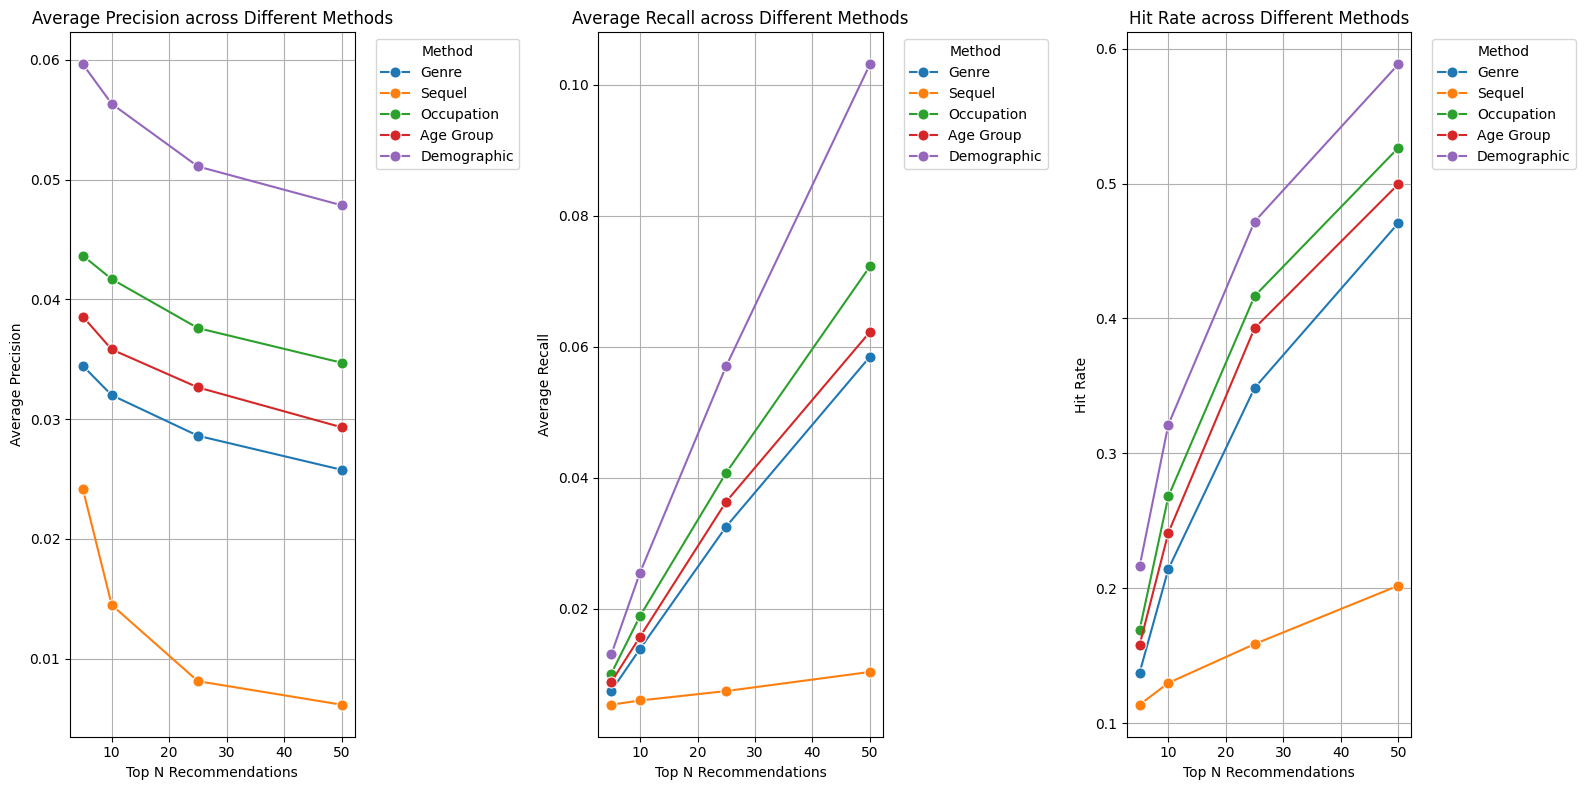

In [63]:
# Create a new column 'Method' in each DataFrame to differentiate between methods
results_df_genre['Method'] = 'Genre'
results_df_sequel['Method'] = 'Sequel'
results_df_occupation['Method'] = 'Occupation'
results_df_age['Method'] = 'Age Group'
results_df_demo['Method'] = 'Demographic'

# Combine all the results DataFrames into one
combined_results = pd.concat([results_df_genre, results_df_sequel, results_df_occupation, results_df_age, results_df_demo], ignore_index=True)
# combined_results = pd.concat([results_df_genre, results_df_occupation, results_df_age, results_df_demo], ignore_index=True)

# Plot the combined graph for all methods (Precision, Recall, and Hit Rate)
def plot_combined_graph(combined_results):
    # Set up the figure
    plt.figure(figsize=(16, 8))

    # List of metrics to plot
    metrics = ['Average Precision', 'Average Recall', 'Hit Rate']
    
    # Create subplots for each metric (Precision, Recall, and Hit Rate)
    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, 3, i)
        sns.lineplot(data=combined_results, x='Top_n', y=metric, hue='Method', marker='o', markersize=8)
        plt.title(f'{metric} across Different Methods')
        plt.xlabel('Top N Recommendations')
        plt.ylabel(metric)
        plt.grid(True)
        plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the graph
plot_combined_graph(combined_results)